<a href="https://colab.research.google.com/github/Equipe16-IAA/IAA015/blob/main/IAA015_Caixeiro_Viajante_GA_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
import numpy as np
from random import randint, random
import random
import matplotlib.pyplot as plt
import math
import copy

#Criando as funções principais do Algorítmo Genético

## Criando as coordenadas das 100 cidades

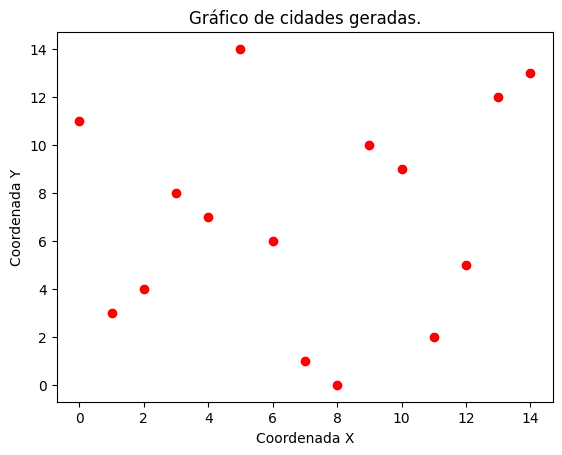

In [266]:
NRO_CIDADES = 15

x_points = list(range(NRO_CIDADES))
y_points = list(range(NRO_CIDADES))

random.shuffle(x_points)
random.shuffle(y_points)

plt.title("Gráfico de cidades geradas.")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.plot(x_points, y_points, 'ro')
plt.show()

###População Inicial

In [123]:
def populacaoInicial(tamanho):
  percursos = []
  percurso = []
  for i in range(0, tamanho):
    cidades = list(range(0, NRO_CIDADES))
    listaCidades = cidades.copy()
    random.shuffle(listaCidades)
    for cidade in cidades:
      cidadePercurso = random.choice(listaCidades)
      listaCidades.remove(cidadePercurso)
      percurso.append(cidadePercurso)
    percursos.append(percurso)
    percurso = []
    cidades = []
  return percursos;

In [124]:
##DEBUG função População Inicial

percursos = populacaoInicial(10)

for percurso in percursos:
  print(percurso)
  print("\n")

[17, 14, 15, 5, 2, 11, 3, 12, 10, 16, 19, 8, 0, 13, 6, 18, 9, 4, 1, 7]


[4, 11, 0, 17, 14, 7, 1, 19, 13, 18, 8, 10, 5, 16, 3, 12, 9, 15, 6, 2]


[11, 3, 18, 16, 5, 12, 0, 17, 14, 13, 15, 4, 8, 6, 10, 1, 9, 7, 2, 19]


[12, 5, 10, 2, 7, 16, 17, 8, 13, 4, 15, 14, 11, 6, 1, 19, 0, 9, 18, 3]


[9, 2, 14, 16, 0, 11, 6, 13, 7, 18, 3, 8, 10, 12, 15, 19, 17, 4, 5, 1]


[18, 3, 17, 15, 19, 2, 14, 12, 11, 10, 16, 13, 7, 6, 1, 4, 8, 5, 0, 9]


[5, 1, 0, 10, 7, 11, 19, 14, 2, 16, 13, 6, 4, 17, 18, 12, 8, 9, 15, 3]


[15, 1, 2, 18, 6, 16, 5, 4, 14, 7, 8, 9, 17, 19, 0, 13, 12, 10, 3, 11]


[12, 18, 11, 3, 9, 16, 4, 8, 6, 13, 7, 15, 10, 14, 1, 19, 5, 2, 0, 17]


[10, 13, 19, 0, 9, 1, 8, 12, 14, 4, 15, 16, 6, 18, 2, 3, 7, 11, 5, 17]




###Verifica Elementos Duplicados

In [125]:
def has_duplicates(lst):
    n = max(set(lst), key=lst.count)
    return lst.count(n) > 1

In [126]:
##DEBUG função duplicados
listaDuplicados = [2, 1, 2, 5, 2]
print(has_duplicates(listaDuplicados))

listaSemDuplicados = [1, 2, 3, 4, 5]
print(has_duplicates(listaSemDuplicados))

True
False


###Função de Avaliação (fit)

In [258]:
##Calcular Distância Euclidiana
##distancia = sqrt(((x2 - x1) ^ 2) + ((y2 - y1) ^ 2));
def FuncaoDeAvaliacao(percursos):
  soma_distancia = np.zeros(len(percursos));
  for index, percurso in enumerate(percursos):
    for i, cidade in enumerate(percurso):
      if i < (len(percurso) - 1):
        soma_distancia[index] += math.sqrt((x_points[percurso[i + 1]] - x_points[percurso[i]])**2 + (y_points[percurso[i + 1]] - y_points[percurso[i]])**2);
      else:
        soma_distancia[index] += math.sqrt((x_points[percurso[i]] - x_points[percurso[0]])**2 + (y_points[percurso[i]] - y_points[percurso[0]])**2);
    if has_duplicates(percurso):
      soma_distancia[index] = 999999999
  return soma_distancia;


def FuncaoDeAvaliacaoV2(percurso):
  soma_distancia = 0
  for i, cidade in enumerate(percurso):
    if i < (len(percurso) - 1):
      soma_distancia += math.sqrt((x_points[percurso[i + 1]] - x_points[percurso[i]])**2 + (y_points[percurso[i + 1]] - y_points[percurso[i]])**2);
    else:
      soma_distancia += math.sqrt((x_points[percurso[i]] - x_points[percurso[0]])**2 + (y_points[percurso[i]] - y_points[percurso[0]])**2);
  if has_duplicates(percurso):
    soma_distancia = 999999999
  return soma_distancia;


In [235]:
##DEBUG Função de Avaliação

percursos = populacaoInicial(2)
print(percursos)
avaliacao = FuncaoDeAvaliacao(percursos)
print(avaliacao)

[[2, 0, 1, 3, 4], [0, 1, 2, 3, 4]]
[ 9.44717053 15.92587919]


###Preserva Melhor da Geração

In [236]:
def preservaMelhor(geracao, novaGeracao):
  avaliacao = FuncaoDeAvaliacao(geracao)
  maior = 0
  for i in range(len(avaliacao)):
    if avaliacao[maior] > avaliacao[i]:
      maior = i
  print(avaliacao[maior])
  novaGeracao.append(geracao[maior])


##Cruzamento Genético

In [130]:
##TODO - Implementar cruzamento XO, para evitar repetição

def cruzamento(geracao, num, nova):
  while True:
    for num in range(num):
      indA = random.randrange(0,len(geracao));
      indB = indA;
      while indA==indB:
        indB = random.randrange(0,len(geracao));
      print(f'cruzamento {indA} e {indB}')
      ponto = random.randrange(1,98)
      print(f'ponto de corte {ponto}')
      filho1 = geracao[indA][0:ponto]
      filho1.extend(geracao[indB][ponto:])
    while filho1 in nova:
      ponto = random.randrange(1,98)
      print(f'novo ponto de corte {ponto}')
      filho1 = geracao[indA][0:ponto]
      filho1.extend(geracao[indB][ponto:])
      if filho1 in nova:
        filho1 = geracao[indB][0:ponto]
        filho1.extend(geracao[indA][ponto:])
    print(f'Novo filho {filho1}')
    nova.append(filho1)
    break



##Mutação

In [194]:
#TODO: Implementar verificação de avaliação antes de inserir o individuo que sofreu mutação na solução, incluir porcentagem para isso ocorrer

def mutacao(geracao, taxaMutacao):
  if randint(1,100) <= taxaMutacao:
    print("Realizando mutacao")
    individuoMutacao = random.randrange(0,len(geracao))
    print(f'Individuo a ser mutado:  {geracao[individuoMutacao]}')
    gene_1 = random.randrange(0,len(geracao[0]))
    gene_2 = random.randrange(0,len(geracao[0]))
    while gene_1 == gene_2:
      gene_2 = random.randrange(0,len(geracao[0]))
    copiaGeracao = copy.deepcopy(geracao)
    temp = copiaGeracao[individuoMutacao][gene_1]
    copiaGeracao[individuoMutacao][gene_1] = copiaGeracao[individuoMutacao][gene_2]
    copiaGeracao[individuoMutacao][gene_2] = temp
    print(f'Individuo a ser mutado:  {geracao[individuoMutacao]} //Resultado após mutação:  {copiaGeracao[individuoMutacao]}')
    avaliacaoCopia = FuncaoDeAvaliacaoV2(copiaGeracao[individuoMutacao])
    avaliacaoGeracao = FuncaoDeAvaliacaoV2(geracao[individuoMutacao])
    print(f'Avaliação antes da mutação: {avaliacaoGeracao}')
    print(f'Avaliação após a mutação: {avaliacaoCopia}')
    ##30% de chances de verificar se a mutação criou individuo melhor antes de executar a mutação
    if random.randrange(0,100) < 101: ##Forcando a sempre entrar aqui para testes
      print(f'Entrou nos 30% da Mutação')
      if avaliacaoCopia < avaliacaoGeracao:
        geracao[individuoMutacao] = copiaGeracao[individuoMutacao]
    else:
      print(f'Mutação não considerou avaliação')
      geracao[individuoMutacao] = copiaGeracao[individuoMutacao]




In [201]:
#Teste Mutacao

geracao = [[1, 2, 3, 4, 5], [5, 4, 3, 2, 1]]
print(geracao)
mutacao(geracao, 100)
print(geracao)

[[1, 2, 3, 4, 5], [5, 4, 3, 2, 1]]
Realizando mutacao
Individuo a ser mutado:  [5, 4, 3, 2, 1]
Individuo a ser mutado:  [5, 4, 3, 2, 1] //Resultado após mutação:  [5, 1, 3, 2, 4]
[5, 1, 3, 2, 4]
[5, 4, 3, 2, 1]
Avaliação antes da mutação: 41.5387214180964
Avaliação após a mutação: 36.26203107769238
Entrou nos 30% da Mutação
[[1, 2, 3, 4, 5], [5, 1, 3, 2, 4]]


##Execução do Algoritmo Genético

[124.29017363 137.75880503 130.15376127 108.10755707 126.32647746
 124.94043339 113.53993068 123.0152082  128.79343907 121.1320837
 123.39917315 129.6787719  117.63578506 114.8806713  106.09891327
 124.9693907  129.63918332 130.25909623 110.41269617 105.07307504
 135.71121675 117.54357431 150.17031691 110.75814863 125.14785018
 125.15319554 140.00586348 127.88983059 127.52164451 118.46762555
 131.06192138 122.32153209 121.76824792 128.61326709 123.64048955
 130.12329797 126.43898462 133.080513   115.12618137 114.5861868
 101.22138726 135.56472388 115.37869419 120.50007825 130.21493586
 125.84013098 115.63352216 122.31713961 119.9215162  127.79917408
 125.22281891 119.79709193 115.29405272 117.46188927 146.66838288
 104.56687796 135.40945709 141.49878362 125.86562977 134.93618248
 130.15698734 115.670322   129.32261705 125.55780873 127.36560604
 113.5143449  134.29303938 123.2759981  124.69539826 136.44790095
 137.29978024 122.0115929  114.1868338  108.1602568  118.0173007
 117.41240641

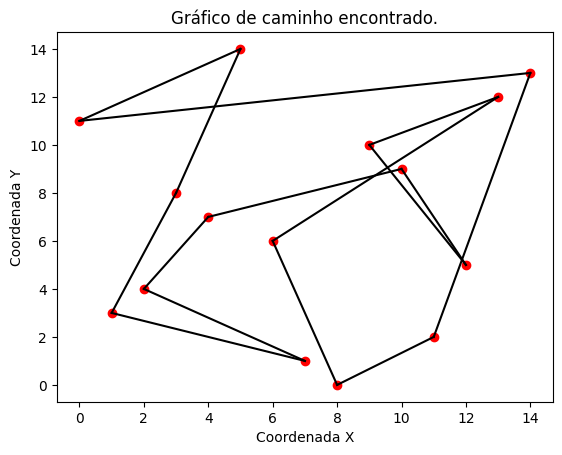

A saída de streaming foi truncada nas últimas 5000 linhas.
ponto de corte 7
cruzamento 0 e 1
ponto de corte 61
cruzamento 0 e 1
ponto de corte 82
cruzamento 1 e 0
ponto de corte 87
cruzamento 0 e 1
ponto de corte 8
cruzamento 1 e 0
ponto de corte 90
cruzamento 1 e 0
ponto de corte 40
cruzamento 1 e 0
ponto de corte 6
cruzamento 0 e 1
ponto de corte 33
cruzamento 1 e 0
ponto de corte 93
cruzamento 1 e 0
ponto de corte 35
cruzamento 1 e 0
ponto de corte 18
cruzamento 1 e 0
ponto de corte 5
cruzamento 0 e 1
ponto de corte 17
cruzamento 0 e 1
ponto de corte 49
cruzamento 0 e 1
ponto de corte 32
cruzamento 1 e 0
ponto de corte 65
cruzamento 1 e 0
ponto de corte 77
cruzamento 0 e 1
ponto de corte 58
cruzamento 0 e 1
ponto de corte 3
cruzamento 1 e 0
ponto de corte 61
cruzamento 1 e 0
ponto de corte 26
cruzamento 1 e 0
ponto de corte 96
cruzamento 0 e 1
ponto de corte 1
cruzamento 1 e 0
ponto de corte 7
cruzamento 1 e 0
ponto de corte 51
cruzamento 1 e 0
ponto de corte 37
cruzamento 0 e 1
pon

In [267]:
#PRESETS AG
#------------------------------
numGeracoes = 1000
populacao = 100
taxaCruzamento = 90
taxaMutacao = 1
#------------------------------
p0 = populacaoInicial(populacao)
print(FuncaoDeAvaliacao(p0))
melhorPrimeiraGeracao = []
preservaMelhor(p0, melhorPrimeiraGeracao)
print(FuncaoDeAvaliacaoV2(melhorPrimeiraGeracao[0]))


plt.title("Gráfico de caminho encontrado.")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.plot(x_points, y_points, 'ro')

for i in range(0, len(melhorPrimeiraGeracao[0]) - 1):
  plt.plot([x_points[melhorPrimeiraGeracao[0][i]], x_points[melhorPrimeiraGeracao[0][i + 1]]], [y_points[melhorPrimeiraGeracao[0][i]], y_points[melhorPrimeiraGeracao[0][i + 1]]], 'k-')
  if i == (len(melhorPrimeiraGeracao[0]) - 2):
    plt.plot([x_points[melhorPrimeiraGeracao[0][i + 1]], x_points[melhorPrimeiraGeracao[0][0]]], [y_points[melhorPrimeiraGeracao[0][i + 1]], y_points[melhorPrimeiraGeracao[0][0]]], 'k-')
plt.show()



avaliacaoP0 = FuncaoDeAvaliacao(p0)

geracao = copy.deepcopy(p0)
while numGeracoes > 0:
  novaGeracao = []
  preservaMelhor(geracao, novaGeracao)
  #print(f'Nova Geracao apos preservar o melhor {novaGeracao}')
  cruzamento(geracao, taxaCruzamento, novaGeracao)
  mutacao(novaGeracao, taxaMutacao)
  numGeracoes = numGeracoes - 1
  avaliacaoNovaGeracao = FuncaoDeAvaliacao(novaGeracao)
  #print(avaliacaoNovaGeracao)
  novaGeracao2 = sorted(zip(avaliacaoNovaGeracao, novaGeracao), reverse=True)
  #print(novaGeracao2)
  geracao = [x for _, x in novaGeracao2]
  #print(f'Geração {numGeracoes} pop= {geracao}')


#print(novaGeracao)

#print(FuncaoDeAvaliacao(novaGeracao))
geracao = novaGeracao.copy()
novaGeracao = []
preservaMelhor(geracao, novaGeracao)




88.92355220473925


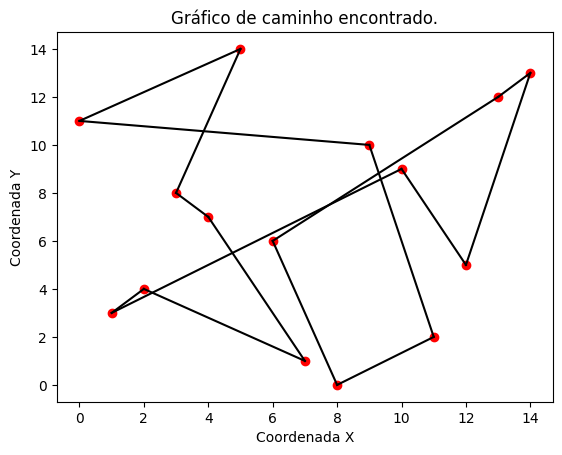

In [268]:
plt.title("Gráfico de caminho encontrado.")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.plot(x_points, y_points, 'ro')

print(FuncaoDeAvaliacaoV2(novaGeracao[0]))

for i in range(0, len(novaGeracao[0]) - 1):
  plt.plot([x_points[novaGeracao[0][i]], x_points[novaGeracao[0][i + 1]]], [y_points[novaGeracao[0][i]], y_points[novaGeracao[0][i + 1]]], 'k-')
  if i == (len(novaGeracao[0]) - 2):
    plt.plot([x_points[novaGeracao[0][i + 1]], x_points[novaGeracao[0][0]]], [y_points[novaGeracao[0][i + 1]], y_points[novaGeracao[0][0]]], 'k-')
plt.show()